## Import paczek potrzebnych do laboratorium

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Liczba uzytkownikow w kolejnych kwartalach (Facebook)

In [3]:
user_count_q = {
    'Q':
        ['Q3 08', 'Q1 09', 'Q2 09', 'Q3 09', 'Q4 09', 'Q1 10',
         'Q2 10', 'Q3 10', 'Q4 10', 'Q1 11', 'Q2 11', 'Q3 11',
         'Q4 11', 'Q1 12', 'Q2 12', 'Q3 12', 'Q4 12', 'Q1 13',
         'Q2 13', 'Q3 13', 'Q4 13', 'Q1 14', 'Q2 14', 'Q3 14',
         'Q4 14', 'Q1 15', 'Q2 15', 'Q3 15', 'Q4 15', 'Q1 16',
         'Q2 16', 'Q3 16', 'Q4 16', 'Q1 17', 'Q2 17', 'Q3 17', 'Q4 17'],
    'User count':
        [100, 197, 242, 305, 360, 431, 482, 550, 608, 680, 739, 800,
         845, 901, 955, 1007, 1056, 1110, 1155, 1189, 1228, 1276, 1317,
         1350, 1393, 1441, 1490, 1545, 1591, 1654, 1712, 1788, 1860, 1936,
         2006, 2072, 2129]
}

## Liczba uzytkownikow w kolejnych kwartalach (Facebook) - dane z lat 2008-2017 - usuwanie roku 2007 gdyz nie ma danych dla poprzedniej tabeli z tego roku


In [4]:
fb_stats_y_old = {
    'Y': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Income': [153, 272, 777, 1974, 3711, 5089, 7872, 12466, 17928, 27638, 40653],
    'Profit': [-138, -56, 229, 606, 1000, 53, 1500, 2940, 3688, 10217, 15934],
    'Employment': [450, 850, 1218, 2127, 3200, 4619, 6337, 9199, 12691, 17048, 25105]
}

# Poprawione dane z 2008-2017
fb_stats_y = {
    'Y': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Income': [272, 777, 1974, 3711, 5089, 7872, 12466, 17928, 27638, 40653],
    'Profit': [-56, 229, 606, 1000, 53, 1500, 2940, 3688, 10217, 15934],
    'Employment': [850, 1218, 2127, 3200, 4619, 6337, 9199, 12691, 17048, 25105]
}

## Tworzenie DataFrame z danymi 

In [7]:
user_count_df = pd.DataFrame(data=user_count_q)
fb_stats_y_df = pd.DataFrame(data=fb_stats_y)
print(fb_stats_y_df)
print(user_count_df)

      Y  Income  Profit  Employment
0  2008     272     -56         850
1  2009     777     229        1218
2  2010    1974     606        2127
3  2011    3711    1000        3200
4  2012    5089      53        4619
5  2013    7872    1500        6337
6  2014   12466    2940        9199
7  2015   17928    3688       12691
8  2016   27638   10217       17048
9  2017   40653   15934       25105
        Q  User count
0   Q3 08         100
1   Q1 09         197
2   Q2 09         242
3   Q3 09         305
4   Q4 09         360
5   Q1 10         431
6   Q2 10         482
7   Q3 10         550
8   Q4 10         608
9   Q1 11         680
10  Q2 11         739
11  Q3 11         800
12  Q4 11         845
13  Q1 12         901
14  Q2 12         955
15  Q3 12        1007
16  Q4 12        1056
17  Q1 13        1110
18  Q2 13        1155
19  Q3 13        1189
20  Q4 13        1228
21  Q1 14        1276
22  Q2 14        1317
23  Q3 14        1350
24  Q4 14        1393
25  Q1 15        1441
26  Q2 15 

In [9]:
def convert_quarter_to_year(quarter):
    year_str = quarter.split(' ')[1]
    year_int = 2000 + int(year_str)
    return year_int


In [11]:
user_count_y_df = user_count_df.copy()
user_count_y_df['Q'] = user_count_df['Q'].map(convert_quarter_to_year)
# Alternatywa byloby zaladowanie danych z Q4 jako max tez dobrze
user_count_y_df = user_count_y_df.groupby('Q', as_index=False).max()
user_count_y_df.rename(columns={'Q': 'Y'}, inplace=True)
print(user_count_y_df)

      Y  User count
0  2008         100
1  2009         360
2  2010         608
3  2011         845
4  2012        1056
5  2013        1228
6  2014        1393
7  2015        1591
8  2016        1860
9  2017        2129


In [17]:
fb_stats_y_df = pd.DataFrame(data=fb_stats_y)
# Calculate costs
fb_stats_y_df['Costs'] = fb_stats_y_df['Income'] - fb_stats_y_df['Profit']
# fb_stats_y_df.drop([0], inplace=True)
fb_stats_y_df.reset_index(drop=True, inplace=True)
fb_stats_y_df.insert(3, 'User count', user_count_y_df['User count'])
print(fb_stats_y_df)


      Y  Income  Profit  User count  Employment  Costs
0  2008     272     -56         100         850    328
1  2009     777     229         360        1218    548
2  2010    1974     606         608        2127   1368
3  2011    3711    1000         845        3200   2711
4  2012    5089      53        1056        4619   5036
5  2013    7872    1500        1228        6337   6372
6  2014   12466    2940        1393        9199   9526
7  2015   17928    3688        1591       12691  14240
8  2016   27638   10217        1860       17048  17421
9  2017   40653   15934        2129       25105  24719


array([[<Axes: xlabel='Y', ylabel='Y'>,
        <Axes: xlabel='Income', ylabel='Y'>,
        <Axes: xlabel='Profit', ylabel='Y'>,
        <Axes: xlabel='User count', ylabel='Y'>,
        <Axes: xlabel='Employment', ylabel='Y'>,
        <Axes: xlabel='Costs', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='Income'>,
        <Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='Profit', ylabel='Income'>,
        <Axes: xlabel='User count', ylabel='Income'>,
        <Axes: xlabel='Employment', ylabel='Income'>,
        <Axes: xlabel='Costs', ylabel='Income'>],
       [<Axes: xlabel='Y', ylabel='Profit'>,
        <Axes: xlabel='Income', ylabel='Profit'>,
        <Axes: xlabel='Profit', ylabel='Profit'>,
        <Axes: xlabel='User count', ylabel='Profit'>,
        <Axes: xlabel='Employment', ylabel='Profit'>,
        <Axes: xlabel='Costs', ylabel='Profit'>],
       [<Axes: xlabel='Y', ylabel='User count'>,
        <Axes: xlabel='Income', ylabel='User count'>,
        <Axes: xla

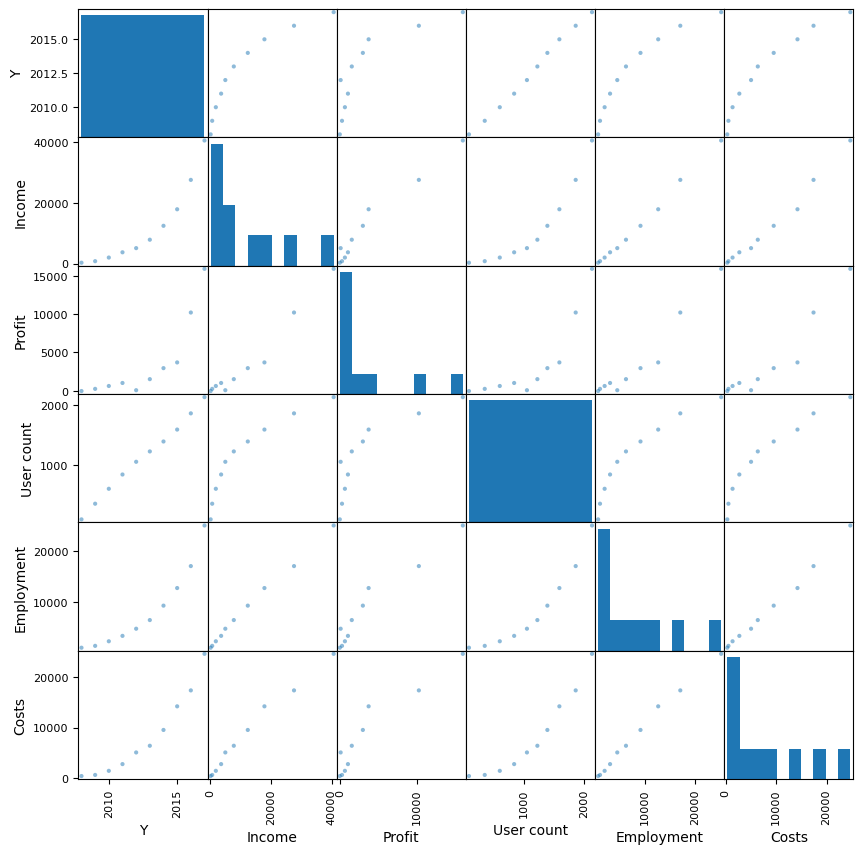

In [18]:
pd.plotting.scatter_matrix(fb_stats_y_df, figsize=(10, 10))

## Tworzenie wykresu iloczynu kartezjanskiego w celu wyzanczeniach zaleznosci miedzy danymi

In [12]:
pd.scatter_matrix(fb_stats_y_df, alpha=0.2, figsize=(6, 6), diagonal='kd')

AttributeError: module 'pandas' has no attribute 'scatter_matrix'